In [190]:
# 필요한 라이브러리 로딩. 만약 인스톨이 안되어있다면 pip install xxx 커맨드를 통해 미리 인스톨한다
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Global variable: temporary API KEY
API_KEY = ''

# get summoner info

In [40]:
# 찾고자 하는 소환사명 (바꿀 수 있음)
# summoner_name = 'flutterdev'
summoner_name = 'h2etul'

# API Call을 할 때 필요한 API KEY를 설정한다
headers = {'X-Riot-Token': API_KEY}

# 정보를 요청할 API 주소 + 소환사명
get_summoner_url = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + summoner_name

# requests 라이브러리를 활용하여 API 주소에 정보 요청을 한다.
# API KEY를 담고 있는 header 필수
sum_response = requests.get(url=get_summoner_url, headers=headers)

In [44]:
# 지금은 아무것도 보이지 않는다. 200이 뜨면 request가 성공적이라는 의미 (error: 404, 403, etc.)
print(sum_response)

<Response [200]>


In [45]:
# Response라는 고유 python class이기 때문
print(type(sum_response))

<class 'requests.models.Response'>


In [46]:
# Response object안에 content라는 항목이 있는데, 이것이 우리가 원하는 정보이다
print(sum_response.content)

b'{"id":"oI9r4n7Or1nb5BKRnCxpdcIbFGemYeRFSpRPIB9Sf7_JpQ","accountId":"cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY","puuid":"X6f2uPjVTxTb-ZxSG8OxNr7DOyojDmqs15Rox79nE8Xoc4qSOc4j7tAEqs_cpNjvadc7c-sgsdHd5w","name":"h2etul","profileIconId":515,"revisionDate":1598495886000,"summonerLevel":147}'


In [47]:
# 근데 위 내용은 정리가 안되어서 분석하기가 어렵다. 데이터 타입이 byte이기 때문
print(type(sum_response.content))

<class 'bytes'>


In [48]:
# json 라이브러리를 이용해 보기 좋은 python "dictionary" data structure로 변환시킨다
sum_dict = json.loads(sum_response.content)

In [49]:
# 예쁘게 잘 정리됨
sum_dict

{'id': 'oI9r4n7Or1nb5BKRnCxpdcIbFGemYeRFSpRPIB9Sf7_JpQ',
 'accountId': 'cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY',
 'puuid': 'X6f2uPjVTxTb-ZxSG8OxNr7DOyojDmqs15Rox79nE8Xoc4qSOc4j7tAEqs_cpNjvadc7c-sgsdHd5w',
 'name': 'h2etul',
 'profileIconId': 515,
 'revisionDate': 1598495886000,
 'summonerLevel': 147}

In [50]:
# 새로 만든 res_dict는 'dict', 즉 python dictionary data structure인 것을 알 수 있음
print(type(sum_dict))

<class 'dict'>


In [51]:
# dictionary는 (key, value) 페어를 여러개 갖고있다. res_dict.keys()를 통해 어떤 key가 있는지 확인 가능
print(sum_dict.keys())

dict_keys(['id', 'accountId', 'puuid', 'name', 'profileIconId', 'revisionDate', 'summonerLevel'])


In [53]:
# bracket [] 안에 key를 입력하면 key에 해당하는 value를 가져올 수 있다
print(sum_dict['name'])

h2etul


In [54]:
# pandas 라이브러리를 통해 excel sheet 과 비슷한 dataframe object로 변환해서 볼 수도 있다
df = pd.DataFrame.from_dict(sum_dict, orient='index')

In [55]:
df

,0
id,oI9r4n7Or1nb5BKRnCxpdcIbFGemYeRFSpRPIB9Sf7_JpQ
accountId,cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY
puuid,X6f2uPjVTxTb-ZxSG8OxNr7DOyojDmqs15Rox79nE8Xoc4...
name,h2etul
profileIconId,515
revisionDate,1598495886000
summonerLevel,147


# get match list

In [57]:
# match list를 가져오기 위해서는 'encryptedAccountId'가 필요하다
# 다행히 좀전에 가져온 accountId 항목을 이용하면 된다

account_id = sum_dict['accountId']
print(account_id)

cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY


In [58]:
# headers는 위에서 이미 설정했지만 연습삼아 한번더
headers = {'X-Riot-Token': API_KEY}

# 정보를 요청할 matchlists API 주소 + accountId
get_ml_url = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + account_id

# 새로운 API에 요청을 보낸다
ml_response = requests.get(url=get_ml_url, headers=headers)

In [60]:
# ㅎㅎ
print(ml_response)

<Response [200]>


In [61]:
# json 라이브러리를 이용해 보기 좋은 python "dictionary" object로 변환시킨다
ml_dict = json.loads(ml_response.content)

In [62]:
# 소환사 API는 짧고 간결했는데, match list는 최근 100경기를 가져와서 길다
ml_dict

{'matches': [{'platformId': 'KR',
   'gameId': 4604768924,
   'champion': 84,
   'queue': 450,
   'season': 13,
   'timestamp': 1598519815434,
   'role': 'SOLO',
   'lane': 'TOP'},
  {'platformId': 'KR',
   'gameId': 4604716255,
   'champion': 40,
   'queue': 440,
   'season': 13,
   'timestamp': 1598518657622,
   'role': 'DUO_SUPPORT',
   'lane': 'NONE'},
  {'platformId': 'KR',
   'gameId': 4585782826,
   'champion': 101,
   'queue': 450,
   'season': 13,
   'timestamp': 1597739304132,
   'role': 'DUO_SUPPORT',
   'lane': 'TOP'},
  {'platformId': 'KR',
   'gameId': 4585667847,
   'champion': 25,
   'queue': 420,
   'season': 13,
   'timestamp': 1597737140721,
   'role': 'DUO_SUPPORT',
   'lane': 'BOTTOM'},
  {'platformId': 'KR',
   'gameId': 4585703561,
   'champion': 40,
   'queue': 420,
   'season': 13,
   'timestamp': 1597735912942,
   'role': 'DUO_SUPPORT',
   'lane': 'NONE'},
  {'platformId': 'KR',
   'gameId': 4576383188,
   'champion': 3,
   'queue': 450,
   'season': 13,
   't

In [64]:
# key는 다음과 같은데, 우리가 원하는건 'matches'에 해당되는 value다
print(ml_dict.keys())

dict_keys(['matches', 'startIndex', 'endIndex', 'totalGames'])


In [65]:
# match 리스트만 보기
match_list = ml_dict['matches']

In [67]:
# 이 친구는 'list'라는 data structure다
print(type(match_list))

<class 'list'>


In [70]:
# list는 인덱스를 활용해 x번재 항목을 가져올 수 있다. 인덱스는 0에서 시작하니 주의
match_list[0]

{'platformId': 'KR',
 'gameId': 4604768924,
 'champion': 84,
 'queue': 450,
 'season': 13,
 'timestamp': 1598519815434,
 'role': 'SOLO',
 'lane': 'TOP'}

#### https://www.op.gg/summoner/userName=h2etul

In [73]:
# 0번째 게임은 가장 최근에 한 ARAM 게임인데, 볼만한게 별로 없으니 3번 (4번째) 모르가나 게임을 예시로 본다
match_example = match_list[3]

In [75]:
# 그런데 25번 챔피언이 어떻게 모르가나인줄 알 수 있을까
match_example

{'platformId': 'KR',
 'gameId': 4585667847,
 'champion': 25,
 'queue': 420,
 'season': 13,
 'timestamp': 1597737140721,
 'role': 'DUO_SUPPORT',
 'lane': 'BOTTOM'}

#### https://developer.riotgames.com/docs/lol#data-dragon_champions

In [76]:
# 라이엇 data dragon api를 쓰면 된다. 이건 오픈된 정보라 API_KEY도 필요 없음 ㅎㅎ
champ_data_url = 'http://ddragon.leagueoflegends.com/cdn/10.18.1/data/en_US/champion.json'

# header 불필요
champ_response = requests.get(url=champ_data_url)

In [80]:
# 위와 동일한 과정
champ_dict = json.loads(champ_response.content)

In [81]:
# 10.18.1 버젼 패치에 해당되는 챔피언 정보가 dictionary 형태로 있음
champ_dict

{'type': 'champion',
 'format': 'standAloneComplex',
 'version': '10.18.1',
 'data': {'Aatrox': {'version': '10.18.1',
   'id': 'Aatrox',
   'key': '266',
   'name': 'Aatrox',
   'title': 'the Darkin Blade',
   'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
   'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
   'image': {'full': 'Aatrox.png',
    'sprite': 'champion0.png',
    'group': 'champion',
    'x': 0,
    'y': 0,
    'w': 48,
    'h': 48},
   'tags': ['Fighter', 'Tank'],
   'partype': 'Blood Well',
   'stats': {'hp': 580,
    'hpperlevel': 90,
    'mp': 0,
    'mpperlevel': 0,
    'movespeed': 345,
    'armor': 38,
    'armorperlevel': 3.25,
    'spellblock': 32.1,
    'spellblockperlevel': 1.25,
    'attackrange': 175,
    'hpregen': 3,
    'h

In [85]:
# 우리가 원하는 항목은 data
print(champ_dict.keys())

dict_keys(['type', 'format', 'version', 'data'])


In [88]:
# dictionary 안에 dictionary가 들어가는 경우가 많다. data도 dictionary임
print(type(champ_dict['data']))

<class 'dict'>


In [86]:
# data
champ_dict['data']

{'Aatrox': {'version': '10.18.1',
  'id': 'Aatrox',
  'key': '266',
  'name': 'Aatrox',
  'title': 'the Darkin Blade',
  'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': 'Blood Well',
  'stats': {'hp': 580,
   'hpperlevel': 90,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 38,
   'armorperlevel': 3.25,
   'spellblock': 32.1,
   'spellblockperlevel': 1.25,
   'attackrange': 175,
   'hpregen': 3,
   'hpregenperlevel': 1,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackdama

In [87]:
# key를 보니 챔프별로 구분되어 있다
print(champ_dict['data'].keys())

dict_keys(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Renekton', 'Rengar', '

In [90]:
# Morgana에 해당되는 또 하나의 dictionary
champ_dict['data']['Morgana']

{'version': '10.18.1',
 'id': 'Morgana',
 'key': '25',
 'name': 'Morgana',
 'title': 'the Fallen',
 'blurb': 'Conflicted between her celestial and mortal natures, Morgana bound her wings to embrace humanity, and inflicts her pain and bitterness upon the dishonest and the corrupt. She rejects laws and traditions she believes are unjust, and fights for truth from...',
 'info': {'attack': 1, 'defense': 6, 'magic': 8, 'difficulty': 1},
 'image': {'full': 'Morgana.png',
  'sprite': 'champion2.png',
  'group': 'champion',
  'x': 288,
  'y': 48,
  'w': 48,
  'h': 48},
 'tags': ['Mage', 'Support'],
 'partype': 'Mana',
 'stats': {'hp': 560,
  'hpperlevel': 90,
  'mp': 340,
  'mpperlevel': 60,
  'movespeed': 335,
  'armor': 25,
  'armorperlevel': 3.8,
  'spellblock': 30,
  'spellblockperlevel': 0.5,
  'attackrange': 450,
  'hpregen': 5.5,
  'hpregenperlevel': 0.4,
  'mpregen': 11,
  'mpregenperlevel': 0.4,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 56,
  'attackdamageperlevel': 3.5,
  '

In [92]:
# Morgana의 'key'라는 값이 25번이라는 것을 알 수 있다 
# 여기서 'key'는 dictionary의 key, value를 보편적으로 일컫는 의미가 아닌 라이엇에서 임의로 지정한 id의 의미로 쓰임
print(champ_dict['data']['Morgana']['key'])

25


In [97]:
# 이름으로 key를 찾을 수는 있는데, key로 이름을 찾는 방법은 없을까?
# data 안에 있는 모든 이름에 대하여, 만약 그 이름에 해당되는 dictionary의 'key'라는 아이디가 '25'면 이름을 찍는다
for name in champ_dict['data'].keys():
    if champ_dict['data'][name]['key'] == '25':
        print(name)    

Morgana


# get match + match timeline

In [98]:
# 위에서 가져온 match_example에 대해 디테일을 알아보자
match_example

{'platformId': 'KR',
 'gameId': 4585667847,
 'champion': 25,
 'queue': 420,
 'season': 13,
 'timestamp': 1597737140721,
 'role': 'DUO_SUPPORT',
 'lane': 'BOTTOM'}

In [118]:
match_id = str(match_example['gameId'])

headers = {'X-Riot-Token': API_KEY}

# 정보를 요청할 matches API 주소 + match_id
get_match_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + match_id

# 새로운 API에 요청을 보낸다
match_response = requests.get(url=get_match_url, headers=headers)

In [119]:
match_dict = json.loads(match_response.content)

In [120]:
# 경기에 대한 각종 디테일
match_dict

{'gameId': 4585667847,
 'platformId': 'KR',
 'gameCreation': 1597737140721,
 'gameDuration': 2008,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '10.16.330.9186',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 1,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 62, 'pickTurn': 1},
    {'championId': 86, 'pickTurn': 2},
    {'championId': 3, 'pickTurn': 3},
    {'championId': 69, 'pickTurn': 4},
    {'championId': 51, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills': 8

In [121]:
match_dict.keys()

dict_keys(['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId', 'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType', 'teams', 'participants', 'participantIdentities'])

In [122]:
# 'teams'키로 팀 정보 구경.. teamId는 100이 파랑이고 200이 보라인듯
match_dict['teams']

[{'teamId': 100,
  'win': 'Fail',
  'firstBlood': False,
  'firstTower': False,
  'firstInhibitor': False,
  'firstBaron': False,
  'firstDragon': True,
  'firstRiftHerald': False,
  'towerKills': 1,
  'inhibitorKills': 0,
  'baronKills': 0,
  'dragonKills': 1,
  'vilemawKills': 0,
  'riftHeraldKills': 0,
  'dominionVictoryScore': 0,
  'bans': [{'championId': 62, 'pickTurn': 1},
   {'championId': 86, 'pickTurn': 2},
   {'championId': 3, 'pickTurn': 3},
   {'championId': 69, 'pickTurn': 4},
   {'championId': 51, 'pickTurn': 5}]},
 {'teamId': 200,
  'win': 'Win',
  'firstBlood': True,
  'firstTower': True,
  'firstInhibitor': True,
  'firstBaron': True,
  'firstDragon': False,
  'firstRiftHerald': True,
  'towerKills': 8,
  'inhibitorKills': 1,
  'baronKills': 1,
  'dragonKills': 4,
  'vilemawKills': 0,
  'riftHeraldKills': 1,
  'dominionVictoryScore': 0,
  'bans': [{'championId': 238, 'pickTurn': 6},
   {'championId': 412, 'pickTurn': 7},
   {'championId': 236, 'pickTurn': 8},
   {'cham

In [126]:
# teams가 list data structure라서 0번째 블루팀 정보를 구경
match_dict['teams'][0]

{'teamId': 100,
 'win': 'Fail',
 'firstBlood': False,
 'firstTower': False,
 'firstInhibitor': False,
 'firstBaron': False,
 'firstDragon': True,
 'firstRiftHerald': False,
 'towerKills': 1,
 'inhibitorKills': 0,
 'baronKills': 0,
 'dragonKills': 1,
 'vilemawKills': 0,
 'riftHeraldKills': 0,
 'dominionVictoryScore': 0,
 'bans': [{'championId': 62, 'pickTurn': 1},
  {'championId': 86, 'pickTurn': 2},
  {'championId': 3, 'pickTurn': 3},
  {'championId': 69, 'pickTurn': 4},
  {'championId': 51, 'pickTurn': 5}]}

In [127]:
# 픽 순서랑 밴도 볼 수 있음 ㅎㅎ
match_dict['teams'][0]['bans']

[{'championId': 62, 'pickTurn': 1},
 {'championId': 86, 'pickTurn': 2},
 {'championId': 3, 'pickTurn': 3},
 {'championId': 69, 'pickTurn': 4},
 {'championId': 51, 'pickTurn': 5}]

In [129]:
# 플레이어 계정 정보
match_dict['participantIdentities']

[{'participantId': 1,
  'player': {'platformId': 'KR',
   'accountId': 'lyVgZNzn821xbt0mKYA8qQeLdk-7X-dY4qnXZ8T8oHwB0sE',
   'summonerName': '양동이대가리',
   'summonerId': '7gt8uyfJM5lRDUJSM5vLqmOiemaV-gYhi9So2pB_LOwzlzU',
   'currentPlatformId': 'KR',
   'currentAccountId': 'lyVgZNzn821xbt0mKYA8qQeLdk-7X-dY4qnXZ8T8oHwB0sE',
   'matchHistoryUri': '/v1/stats/player_history/KR/200287273',
   'profileIcon': 2089}},
 {'participantId': 2,
  'player': {'platformId': 'kr',
   'accountId': 'OxIobMxVEzeEGXTzEZdrMP9uJBsgQ2q6fOBb8CTm3TfGXj4',
   'summonerName': 'Besnoker',
   'summonerId': 'eON7Dngtl9X-zeSy6EcBHC2ow_2HcurcOg4p0MODXBCTI2k',
   'currentPlatformId': 'KR',
   'currentAccountId': 'OxIobMxVEzeEGXTzEZdrMP9uJBsgQ2q6fOBb8CTm3TfGXj4',
   'matchHistoryUri': '/v1/stats/player_history/kr/210465006',
   'profileIcon': 4354}},
 {'participantId': 3,
  'player': {'platformId': 'KR',
   'accountId': 'UCbgbA-P5K8X6c5O_dsuE5xQbJ4qCO_9OZJ7uk-4yd_6s4g',
   'summonerName': '데스코알라',
   'summonerId': 'yy-9dM

In [136]:
print(type(match_dict['participantIdentities']))

<class 'list'>


In [132]:
# 히털은 participantId: 6
for participant in match_dict['participantIdentities']:
    if participant['player']['summonerName'] == 'h2etul':
        print(participant)

{'participantId': 6, 'player': {'platformId': 'KR', 'accountId': 'cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY', 'summonerName': 'h2etul', 'summonerId': 'oI9r4n7Or1nb5BKRnCxpdcIbFGemYeRFSpRPIB9Sf7_JpQ', 'currentPlatformId': 'KR', 'currentAccountId': 'cY-zOyOnrjluGdUsPph3IdiUj7PHmdAjZcERvU0ytjY', 'matchHistoryUri': '/v1/stats/player_history/KR/486387', 'profileIcon': 515}}


In [128]:
# 플레이어 게임 정보
match_dict['participants']

[{'participantId': 1,
  'teamId': 100,
  'championId': 777,
  'spell1Id': 4,
  'spell2Id': 14,
  'stats': {'participantId': 1,
   'win': False,
   'item0': 1055,
   'item1': 3006,
   'item2': 3046,
   'item3': 3031,
   'item4': 3812,
   'item5': 0,
   'item6': 3364,
   'kills': 5,
   'deaths': 7,
   'assists': 6,
   'largestKillingSpree': 3,
   'largestMultiKill': 2,
   'killingSprees': 1,
   'longestTimeSpentLiving': 667,
   'doubleKills': 1,
   'tripleKills': 0,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 140454,
   'magicDamageDealt': 12364,
   'physicalDamageDealt': 124384,
   'trueDamageDealt': 3705,
   'largestCriticalStrike': 539,
   'totalDamageDealtToChampions': 21988,
   'magicDamageDealtToChampions': 3747,
   'physicalDamageDealtToChampions': 14534,
   'trueDamageDealtToChampions': 3705,
   'totalHeal': 3744,
   'totalUnitsHealed': 1,
   'damageSelfMitigated': 18635,
   'damageDealtToObjectives': 162,
   'damageDealtToTurrets': 162,
 

In [137]:
print(type(match_dict['participants']))

<class 'list'>


In [139]:
# 6번 participant 정보를 heetul이라는 variable에 저장하자
heetul = None;


for participant in match_dict['participants']:
    if participant['participantId'] == 6:
        heetul = participant

In [141]:
# 이김 ㅎㅎ
# 특성 정보도 있고 게임 결과창에는 볼 수 없는 데이터도 있음
heetul

{'participantId': 6,
 'teamId': 200,
 'championId': 25,
 'spell1Id': 3,
 'spell2Id': 4,
 'stats': {'participantId': 6,
  'win': True,
  'item0': 3157,
  'item1': 2065,
  'item2': 3860,
  'item3': 1052,
  'item4': 0,
  'item5': 3047,
  'item6': 3364,
  'kills': 2,
  'deaths': 4,
  'assists': 23,
  'largestKillingSpree': 0,
  'largestMultiKill': 2,
  'killingSprees': 0,
  'longestTimeSpentLiving': 744,
  'doubleKills': 1,
  'tripleKills': 0,
  'quadraKills': 0,
  'pentaKills': 0,
  'unrealKills': 0,
  'totalDamageDealt': 31016,
  'magicDamageDealt': 19174,
  'physicalDamageDealt': 6458,
  'trueDamageDealt': 5384,
  'largestCriticalStrike': 0,
  'totalDamageDealtToChampions': 8762,
  'magicDamageDealtToChampions': 7303,
  'physicalDamageDealtToChampions': 1432,
  'trueDamageDealtToChampions': 26,
  'totalHeal': 2836,
  'totalUnitsHealed': 5,
  'damageSelfMitigated': 10740,
  'damageDealtToObjectives': 3967,
  'damageDealtToTurrets': 1356,
  'visionScore': 73,
  'timeCCingOthers': 54,
  't

In [143]:
heetul.keys()

dict_keys(['participantId', 'teamId', 'championId', 'spell1Id', 'spell2Id', 'stats', 'timeline'])

In [144]:
# 10분마다 분당 cs/골드/경험치 차이 기록
# 순서가 이상한데 0-10, 10-20, 20-30 순으로 보면 갈수록 차이가 벌어지는 것을 알 수 있음
heetul['timeline']

{'participantId': 6,
 'creepsPerMinDeltas': {'10-20': 1.6, '0-10': 1.3, '20-30': 0.4},
 'xpPerMinDeltas': {'10-20': 331.4, '0-10': 246.3, '20-30': 373.6},
 'goldPerMinDeltas': {'10-20': 291.8, '0-10': 162.5, '20-30': 244.7},
 'csDiffPerMinDeltas': {'10-20': -0.2500000000000002,
  '0-10': 0.44999999999999996,
  '20-30': -0.44999999999999984},
 'xpDiffPerMinDeltas': {'10-20': -33.599999999999966,
  '0-10': 26.450000000000017,
  '20-30': 13.500000000000028},
 'damageTakenPerMinDeltas': {'10-20': 344.8, '0-10': 116.5, '20-30': 659.6},
 'damageTakenDiffPerMinDeltas': {'10-20': 6.249999999999972,
  '0-10': -48.45,
  '20-30': -73.24999999999994},
 'role': 'DUO_SUPPORT',
 'lane': 'BOTTOM'}

# match timeline details

In [100]:
match_id = str(match_example['gameId'])

headers = {'X-Riot-Token': API_KEY}

# 정보를 요청할 timeline API 주소 + match_id
get_tl_url = 'https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/' + match_id

# 새로운 API에 요청을 보낸다
tl_response = requests.get(url=get_tl_url, headers=headers)

In [101]:
tl_dict = json.loads(tl_response.content)

In [102]:
tl_dict

{'frames': [{'participantFrames': {'1': {'participantId': 2,
     'position': {'x': 560, 'y': 581},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '2': {'participantId': 4,
     'position': {'x': 560, 'y': 361},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '3': {'participantId': 1,
     'position': {'x': 351, 'y': 293},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '4': {'participantId': 5,
     'position': {'x': 221, 'y': 471},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'domini

In [104]:
print(tl_dict.keys())

dict_keys(['frames', 'frameInterval'])


In [107]:
print(type(tl_dict['frames']))

<class 'list'>


In [110]:
# 60000 프레임당 한번씩 경기 스냅샷을 찍나보다
print(tl_dict['frameInterval'])

60000


In [114]:
# len()을 쓰면 list가 얼마나 긴지 알 수 있다. 스냅샷은 총 35개
# 실제 경기가 33분 28초였으니, 아마 60000 frames = 1분 정도 되나보다. 초당 1000프레임?
# 1분마다 스냅샷이 있는것도 나쁘진 않은데 좀 더 디테일한 insight을 얻으려면 리플레이 데이터를 분석하는게 좋을지도
print(len(tl_dict['frames']))

35


In [111]:
# 첫번째 프레임은 경기 시작 시점이라 아무것도 없음
tl_dict['frames'][0]

{'participantFrames': {'1': {'participantId': 2,
   'position': {'x': 560, 'y': 581},
   'currentGold': 500,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '2': {'participantId': 4,
   'position': {'x': 560, 'y': 361},
   'currentGold': 500,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '3': {'participantId': 1,
   'position': {'x': 351, 'y': 293},
   'currentGold': 500,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '4': {'participantId': 5,
   'position': {'x': 221, 'y': 471},
   'currentGold': 500,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '5': {'participantId': 3,
   'position': {'x': 311, '

In [115]:
tl_dict['frames'][0].keys()

dict_keys(['participantFrames', 'events', 'timestamp'])

In [117]:
# 10명 선수마다 상황을 볼 수 있음
tl_dict['frames'][0]['participantFrames']

{'1': {'participantId': 2,
  'position': {'x': 560, 'y': 581},
  'currentGold': 500,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '2': {'participantId': 4,
  'position': {'x': 560, 'y': 361},
  'currentGold': 500,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '3': {'participantId': 1,
  'position': {'x': 351, 'y': 293},
  'currentGold': 500,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '4': {'participantId': 5,
  'position': {'x': 221, 'y': 471},
  'currentGold': 500,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '5': {'participantId': 3,
  'position': {'x': 311, 'y': 649},
  'currentGold': 500,
  'totalGold': 500,
  'level': 

In [112]:
# 1분이 지났는데 그닥 많은 일은 없었지만 다들 아이템을 샀다
tl_dict['frames'][1]

{'participantFrames': {'1': {'participantId': 2,
   'position': {'x': 3163, 'y': 7446},
   'currentGold': 0,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '2': {'participantId': 4,
   'position': {'x': 6026, 'y': 5633},
   'currentGold': 0,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '3': {'participantId': 1,
   'position': {'x': 6243, 'y': 5776},
   'currentGold': 0,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '4': {'participantId': 5,
   'position': {'x': 7547, 'y': 3098},
   'currentGold': 0,
   'totalGold': 500,
   'level': 1,
   'xp': 0,
   'minionsKilled': 0,
   'jungleMinionsKilled': 0,
   'dominionScore': 0,
   'teamScore': 0},
  '5': {'participantId': 3,
   'position': {'x': 7904, 

In [145]:
tl_dict['frames'][1].keys()

dict_keys(['participantFrames', 'events', 'timestamp'])

In [148]:
# 누가 구리게 만들었는지 key랑 participant id랑 일치하지 않음;;
tl_dict['frames'][1]['participantFrames']

{'1': {'participantId': 2,
  'position': {'x': 3163, 'y': 7446},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '2': {'participantId': 4,
  'position': {'x': 6026, 'y': 5633},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '3': {'participantId': 1,
  'position': {'x': 6243, 'y': 5776},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '4': {'participantId': 5,
  'position': {'x': 7547, 'y': 3098},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '5': {'participantId': 3,
  'position': {'x': 7904, 'y': 5868},
  'currentGold': 0,
  'totalGold': 500,
  'level': 

In [153]:
# 히털 찾기 (위에 만든 heetul과는 다른 정보라 heetul2로 구분)

minute_1 = tl_dict['frames'][1]['participantFrames']

heetul2 = None;

for key in minute_1.keys():
    if minute_1[key]['participantId'] == 6:
        heetul2 = minute_1[key]

In [154]:
# 1분 위치 알 수 있음
heetul2

{'participantId': 6,
 'position': {'x': 12564, 'y': 11610},
 'currentGold': 0,
 'totalGold': 500,
 'level': 1,
 'xp': 0,
 'minionsKilled': 0,
 'jungleMinionsKilled': 0,
 'dominionScore': 0,
 'teamScore': 0}

In [155]:
# 1분 동안 많은 일이 있었다
events_1 = tl_dict['frames'][1]['events']

In [156]:
events_1

[{'type': 'ITEM_PURCHASED',
  'timestamp': 3376,
  'participantId': 10,
  'itemId': 1055},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 3706,
  'participantId': 10,
  'itemId': 2003},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 4169,
  'participantId': 10,
  'itemId': 3340},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 5126,
  'participantId': 6,
  'itemId': 3340},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 7339,
  'participantId': 4,
  'itemId': 1041},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 7768,
  'participantId': 4,
  'itemId': 2031},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 8198,
  'participantId': 4,
  'itemId': 3340},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 10641,
  'participantId': 5,
  'itemId': 1055},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 10972,
  'participantId': 5,
  'itemId': 2003},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 11335,
  'participantId': 6,
  'itemId': 3858},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 11335,
  'participantId': 5,
  'itemId': 3340},
 {'

In [159]:
# 히털 관련 이벤트 모음
# 이벤트마다 participantId가 6인 경우 추가함
# 근데 WARD_PLACED 같은 경우 'participantId' 항목이 없어서 'creatorId'를 써야함;; 첨부터 좀 제대로 만들지
heetul_events = []

for event in events_1:
    print(event)
    
    if event['participantId'] == 6:
        heetul_events.append(event)

{'type': 'ITEM_PURCHASED', 'timestamp': 3376, 'participantId': 10, 'itemId': 1055}
{'type': 'ITEM_PURCHASED', 'timestamp': 3706, 'participantId': 10, 'itemId': 2003}
{'type': 'ITEM_PURCHASED', 'timestamp': 4169, 'participantId': 10, 'itemId': 3340}
{'type': 'ITEM_PURCHASED', 'timestamp': 5126, 'participantId': 6, 'itemId': 3340}
{'type': 'ITEM_PURCHASED', 'timestamp': 7339, 'participantId': 4, 'itemId': 1041}
{'type': 'ITEM_PURCHASED', 'timestamp': 7768, 'participantId': 4, 'itemId': 2031}
{'type': 'ITEM_PURCHASED', 'timestamp': 8198, 'participantId': 4, 'itemId': 3340}
{'type': 'ITEM_PURCHASED', 'timestamp': 10641, 'participantId': 5, 'itemId': 1055}
{'type': 'ITEM_PURCHASED', 'timestamp': 10972, 'participantId': 5, 'itemId': 2003}
{'type': 'ITEM_PURCHASED', 'timestamp': 11335, 'participantId': 6, 'itemId': 3858}
{'type': 'ITEM_PURCHASED', 'timestamp': 11335, 'participantId': 5, 'itemId': 3340}
{'type': 'ITEM_PURCHASED', 'timestamp': 11896, 'participantId': 6, 'itemId': 2003}
{'type':

KeyError: 'participantId'

In [160]:
heetul_events = []

for event in events_1:
    
    # WARD_PLACED 이벤트일 경우 creatorId 기준으로 추가
    if event['type'] == 'WARD_PLACED':
        if event['creatorId'] == 6:
            heetul_events.append(event)        
    
    # 이 외에는 participantId 기준으로 추가
    else:
        if event['participantId'] == 6:
            heetul_events.append(event)
        

In [161]:
# 템 산다음 열심히 달려가 노랑 와드를 설치하고 빨강 와드로 바꿨다는 것을 알 수 있음
heetul_events

[{'type': 'ITEM_PURCHASED',
  'timestamp': 5126,
  'participantId': 6,
  'itemId': 3340},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 11335,
  'participantId': 6,
  'itemId': 3858},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 11896,
  'participantId': 6,
  'itemId': 2003},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 12128,
  'participantId': 6,
  'itemId': 2003},
 {'type': 'WARD_PLACED',
  'timestamp': 38752,
  'wardType': 'YELLOW_TRINKET',
  'creatorId': 6},
 {'type': 'ITEM_PURCHASED',
  'timestamp': 50840,
  'participantId': 6,
  'itemId': 3364},
 {'type': 'ITEM_DESTROYED',
  'timestamp': 50840,
  'participantId': 6,
  'itemId': 3340}]

In [173]:
# 34분 게임 동안 히털의 위치를 좌표에 그려보자

# 새로 만들 히털 데이터
heetul_data = []


# 재료: 타임라인 dictionary
tl_dict['frames']

# 스냅샷마다 반복해서 heetul_position에 정보를 추가함
for frame in tl_dict['frames']:
    
    # 스냅샷마다 새로운 dictionary를 만들어서 기록    
    heetul_frame = {}
    
    # 해당 스냅샷 timestamp를 저장
    heetul_frame['timestamp'] = frame['timestamp']

    
    # 위에서 썼던 participantFrames에서 히털 찾기 코드
    heetul = None;

    for key in frame['participantFrames'].keys():
        if frame['participantFrames'][key]['participantId'] == 6:
            heetul = frame['participantFrames'][key]    
    
    
    # 아까 heetul은 대충 요렇게 생겼기 때문에 (코드 아님)
    """
    {'participantId': 6,
     'position': {'x': 12564, 'y': 11610},
     'currentGold': 0,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0}    
    """
    
    print(heetul)
    
    
    # 쓸만한거 가져오면 됨
    heetul_frame['position'] = heetul['position']
    heetul_frame['totalGold'] = heetul['totalGold']
    heetul_frame['level'] = heetul['level']
    heetul_frame['xp'] = heetul['xp']
    
    
    # 마지막으로, 새로 만든 히털 프레임 dictionary를 히털 데이터 list에 추가    
    heetul_data.append(heetul_frame)

{'participantId': 6, 'position': {'x': 14237, 'y': 14579}, 'currentGold': 500, 'totalGold': 500, 'level': 1, 'xp': 0, 'minionsKilled': 0, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0}
{'participantId': 6, 'position': {'x': 12564, 'y': 11610}, 'currentGold': 0, 'totalGold': 500, 'level': 1, 'xp': 0, 'minionsKilled': 0, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0}
{'participantId': 6, 'position': {'x': 12947, 'y': 2632}, 'currentGold': 65, 'totalGold': 565, 'level': 1, 'xp': 150, 'minionsKilled': 2, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0}
{'participantId': 6, 'position': {'x': 13715, 'y': 3936}, 'currentGold': 213, 'totalGold': 713, 'level': 2, 'xp': 412, 'minionsKilled': 3, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0}
{'participantId': 6, 'position': {'x': 14087, 'y': 13850}, 'currentGold': 123, 'totalGold': 923, 'level': 3, 'xp': 749, 'minionsKilled': 3, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0}

KeyError: 'position'

In [180]:
#### 위에서 마지막 스냅샷에 'position'정보가 없어서 에러 생기므로 수정

# 새로 만들 히털 데이터
heetul_data = []


# 재료: 타임라인 dictionary
tl_dict['frames']

# 스냅샷마다 반복해서 heetul_position에 정보를 추가함
for frame in tl_dict['frames']:
    
    # 스냅샷마다 새로운 dictionary를 만들어서 기록    
    heetul_frame = {}
    
    # 해당 스냅샷 timestamp를 저장
    heetul_frame['timestamp'] = frame['timestamp']

    
    # 위에서 썼던 participantFrames에서 히털 찾기 코드
    heetul = None;

    for key in frame['participantFrames'].keys():
        if frame['participantFrames'][key]['participantId'] == 6:
            heetul = frame['participantFrames'][key]    
    
    
    # 아까 heetul은 대충 요렇게 생겼기 때문에 (코드 아님)
    """
    {'participantId': 6,
     'position': {'x': 12564, 'y': 11610},
     'currentGold': 0,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0}    
    """
    
    
    # 수정한 부분
    if 'position' in heetul.keys():  
        heetul_frame['position_x'] = heetul['position']['x']
        heetul_frame['position_y'] = heetul['position']['y']        
    else:
        heetul_frame['position_x'] = None
        heetul_frame['position_y'] = None
    heetul_frame['totalGold'] = heetul['totalGold']
    heetul_frame['level'] = heetul['level']
    heetul_frame['xp'] = heetul['xp']
    
    
    # 마지막으로, 새로 만든 히털 프레임 dictionary를 히털 데이터 list에 추가    
    heetul_data.append(heetul_frame)

In [181]:
heetul_data

[{'timestamp': 0,
  'position_x': 14237,
  'position_y': 14579,
  'totalGold': 500,
  'level': 1,
  'xp': 0},
 {'timestamp': 60023,
  'position_x': 12564,
  'position_y': 11610,
  'totalGold': 500,
  'level': 1,
  'xp': 0},
 {'timestamp': 120043,
  'position_x': 12947,
  'position_y': 2632,
  'totalGold': 565,
  'level': 1,
  'xp': 150},
 {'timestamp': 180062,
  'position_x': 13715,
  'position_y': 3936,
  'totalGold': 713,
  'level': 2,
  'xp': 412},
 {'timestamp': 240082,
  'position_x': 14087,
  'position_y': 13850,
  'totalGold': 923,
  'level': 3,
  'xp': 749},
 {'timestamp': 300095,
  'position_x': 12464,
  'position_y': 1988,
  'totalGold': 1067,
  'level': 3,
  'xp': 923},
 {'timestamp': 360112,
  'position_x': 14005,
  'position_y': 13748,
  'totalGold': 1258,
  'level': 3,
  'xp': 1091},
 {'timestamp': 420127,
  'position_x': 9753,
  'position_y': 5400,
  'totalGold': 1422,
  'level': 4,
  'xp': 1166},
 {'timestamp': 480149,
  'position_x': 13215,
  'position_y': 4115,
  'tot

In [182]:
# pandas 라이브러리를 통해 예쁘게 줄 세워보자
df = pd.DataFrame.from_dict(heetul_data)

In [183]:
df

,timestamp,position_x,position_y,totalGold,level,xp
0,0,14237.0,14579.0,500,1,0
1,60023,12564.0,11610.0,500,1,0
2,120043,12947.0,2632.0,565,1,150
3,180062,13715.0,3936.0,713,2,412
4,240082,14087.0,13850.0,923,3,749
5,300095,12464.0,1988.0,1067,3,923
6,360112,14005.0,13748.0,1258,3,1091
7,420127,9753.0,5400.0,1422,4,1166
8,480149,13215.0,4115.0,1721,4,1718
9,540170,11621.0,1696.0,1949,5,2113


In [184]:
# dataframe 이라는 class는 이 나름대로 할 수 있는 기능이 굉장히 많음
type(df)

pandas.core.frame.DataFrame

In [189]:
# 부분 선택 등
df[['position_x', 'position_y']]

,position_x,position_y
0,14237.0,14579.0
1,12564.0,11610.0
2,12947.0,2632.0
3,13715.0,3936.0
4,14087.0,13850.0
5,12464.0,1988.0
6,14005.0,13748.0
7,9753.0,5400.0
8,13215.0,4115.0
9,11621.0,1696.0


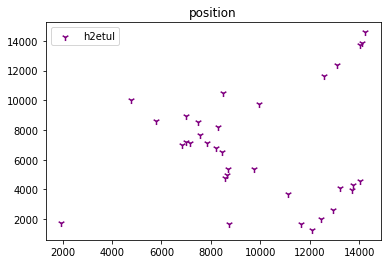

In [196]:
# matplotlib의 pyplot 라이브러리를 활용하면 간단한 visualization을 할 수 있음

x = df['position_x']
y = df['position_y']
label= df

plt.scatter(x, y, label="h2etul", color="purple",
            marker="1", s=50)



plt.title('position')
plt.legend()

plt.show()

posx and posy should be finite values
posx and posy should be finite values


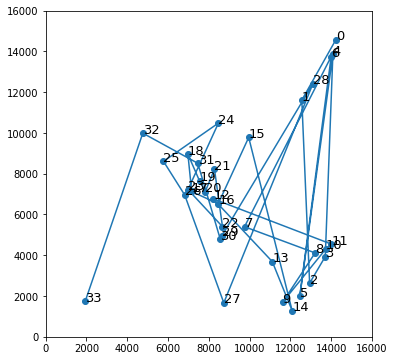

In [214]:
# 약간의 응용

im = plt.imread(image_name)

x = df['position_x']
y = df['position_y']

plt.figure(figsize=(6, 6))

plt.plot(x, y, "-o")

plt.xlim(0, 16000)
plt.ylim(0, 16000)
plt.gca().set_aspect('equal', adjustable='box')

for xpos, ypos, minute in zip(x, y, df.index):
    plt.text(xpos, ypos, minute, fontsize=13)

plt.show()
